In [1]:
!pip install xgboost
!pip install catboost

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('data/AirPass.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
data.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [6]:
data = data.fillna({'Arrival Delay in Minutes':data['Arrival Delay in Minutes'].median()})
data['Arrival Delay in Minutes'].mean()

15.133392362180475

In [7]:
pivot = data.pivot_table(columns=data['Gender'], index=data['satisfaction'], aggfunc='count')
pivot

Age        Arrival Delay in Minutes         \
Gender                  Female   Male                   Female   Male   
satisfaction                                                            
neutral or dissatisfied  30193  28686                    30193  28686   
satisfied                22534  22491                    22534  22491   

                        Baggage handling        Checkin service         Class  \
Gender                            Female   Male          Female   Male Female   
satisfaction                                                                    
neutral or dissatisfied            30193  28686           30193  28686  30193   
satisfied                          22534  22491           22534  22491  22534   

                                ... On-board service        Online boarding  \
Gender                    Male  ...           Female   Male          Female   
satisfaction                    ...                                           
neutral or dissatisfied  28686  ...            30193  28686           30193   
satisfied                22491  ...            22534  22491           22534   

                               Seat comfort        Type of Travel         \
Gender                    Male       Female   Male         Female   Male   
satisfaction                                                               
neutral or dissatisfied  28686        30193  28686          30193  28686   
satisfied                22491        22534  22491          22534  22491   

                            id         
Gender                  Female   Male  
satisfaction                           
neutral or dissatisfied  30193  28686  
satisfied                22534  22491  

[2 rows x 44 columns]

<AxesSubplot: xlabel='Type of Travel', ylabel='satisfaction'>

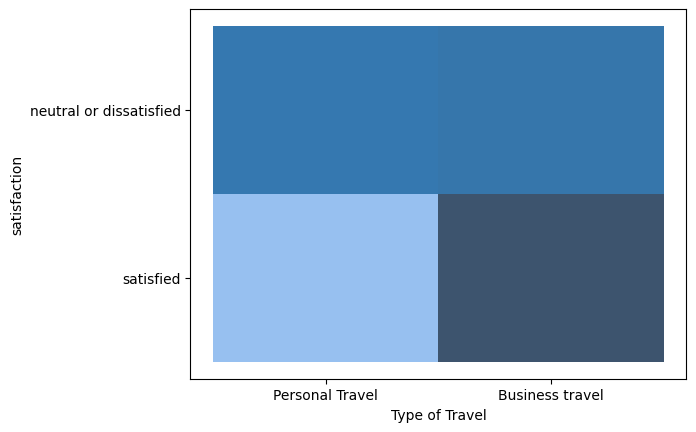

In [8]:
sns.histplot(data, x='Type of Travel', y='satisfaction')

In [9]:
data[data['satisfaction']=='satisfied']['Class'].value_counts()

Business    34480
Eco          8701
Eco Plus     1844
Name: Class, dtype: int64

In [10]:
df = data

In [11]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [12]:
df = pd.get_dummies(df)
df.shape

(103904, 26)

In [13]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [14]:
from sklearn import model_selection, preprocessing

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=26)
X_train.shape

(83123, 25)

In [16]:
X_test.shape

(20781, 25)

In [17]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_test_scaled

array([[ 0.94082514, -1.0182236 ,  0.47381845, ...,  1.04624209,
        -0.90523003, -0.27897268],
       [-0.86687265,  0.98210256,  0.47381845, ...,  1.04624209,
        -0.90523003, -0.27897268],
       [-1.63303947,  0.98210256, -2.11051299, ..., -0.95580173,
         1.10469159, -0.27897268],
       ...,
       [ 1.52620083, -1.0182236 , -2.11051299, ..., -0.95580173,
         1.10469159, -0.27897268],
       [-0.60330678, -1.0182236 ,  0.47381845, ..., -0.95580173,
         1.10469159, -0.27897268],
       [ 1.34108544, -1.0182236 ,  0.47381845, ...,  1.04624209,
        -0.90523003, -0.27897268]])

In [19]:
from sklearn import linear_model, metrics


In [22]:
model_1 = linear_model.LogisticRegression()
model_1.fit(X_train_scaled, y_train)
y_1_pred = model_1.predict(X_test_scaled)
print('F1 score:', round(metrics.f1_score(y_test, y_1_pred), 3))

F1 score: 0.855


In [24]:
from sklearn import ensemble, tree

In [26]:
adaboost = ensemble.AdaBoostClassifier(random_state=26, learning_rate=0.01, estimator=tree.DecisionTreeRegressor(random_state=26))
adaboost.fit(X_train_scaled, y_train)
y_ada_pred = adaboost.predict(X_test_scaled)
print('F1 score:', round(metrics.f1_score(y_test, y_ada_pred), 3))

c:\Users\Anna\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


F1 score: 0.956


In [28]:
import numpy as np

In [30]:
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
grid_search = model_selection.GridSearchCV(estimator=ensemble.GradientBoostingClassifier(random_state=42), cv=3, param_grid=params)
grid_search.fit(X_train_scaled, y_train)
print('best params:', grid_search.best_params_)


best params: {'learning_rate': 1.0, 'n_estimators': 128}


In [31]:
grad = ensemble.GradientBoostingClassifier(random_state=26, learning_rate= 1, n_estimators=128)
grad.fit(X_train_scaled, y_train)
y_grad_pred = grad.predict(X_test_scaled)
print('F1 score:', round(metrics.f1_score(y_test, y_grad_pred), 3))

F1 score: 0.951


In [32]:
import xgboost, catboost

In [33]:
xg_model = xgboost.XGBClassifier(random_state = 26)
xg_model.fit(X_train_scaled, y_train)
y_xg_pred = xg_model.predict(X_test_scaled)
print('F1 score:', round(metrics.f1_score(y_test, y_xg_pred), 3))

F1 score: 0.958


In [34]:
cb_model = catboost.CatBoostClassifier(random_state = 26)
cb_model.fit(X_train_scaled, y_train)
y_cb_pred = cb_model.predict(X_test_scaled)
print('F1 score:', round(metrics.f1_score(y_test, y_cb_pred), 3))

Learning rate set to 0.068023
0:	learn: 0.6018089	total: 179ms	remaining: 2m 58s
1:	learn: 0.5020769	total: 212ms	remaining: 1m 45s
2:	learn: 0.4472481	total: 241ms	remaining: 1m 20s
3:	learn: 0.4028675	total: 266ms	remaining: 1m 6s
4:	learn: 0.3674724	total: 291ms	remaining: 58s
5:	learn: 0.3397844	total: 318ms	remaining: 52.8s
6:	learn: 0.3121211	total: 346ms	remaining: 49s
7:	learn: 0.2917499	total: 370ms	remaining: 45.9s
8:	learn: 0.2749039	total: 395ms	remaining: 43.5s
9:	learn: 0.2575191	total: 433ms	remaining: 42.9s
10:	learn: 0.2473690	total: 465ms	remaining: 41.8s
11:	learn: 0.2377531	total: 491ms	remaining: 40.4s
12:	learn: 0.2279309	total: 520ms	remaining: 39.5s
13:	learn: 0.2212512	total: 547ms	remaining: 38.6s
14:	learn: 0.2100359	total: 577ms	remaining: 37.9s
15:	learn: 0.2025733	total: 604ms	remaining: 37.1s
16:	learn: 0.1942303	total: 633ms	remaining: 36.6s
17:	learn: 0.1877939	total: 665ms	remaining: 36.3s
18:	learn: 0.1832381	total: 695ms	remaining: 35.9s
19:	learn: 0

In [35]:
from catboost import Pool, CatBoostClassifier
from catboost.utils import get_confusion_matrix

In [41]:
cm = (get_confusion_matrix(cb_model, Pool(X_train_scaled, y_train))/X_train_scaled.shape[0]*100).round()
print(cm)

[[56.  1.]
 [ 2. 42.]]


<AxesSubplot: >

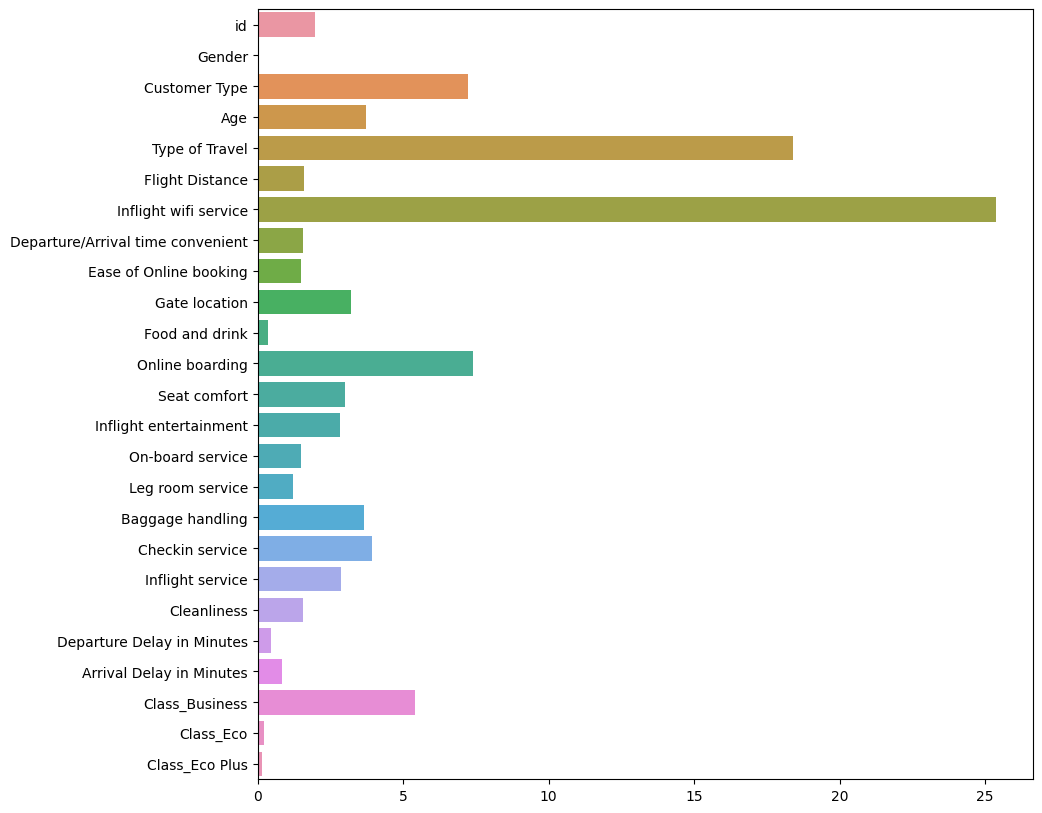

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
feature = X.columns
feat_imp = cb_model.feature_importances_
sns.barplot(y=feature, x=feat_imp, ax=ax)